# Tarea 2


### Parte 2.d.

Genera una muestra de tamaño $T=100$ del modelo descrito, utilizando $c=1$, $\varphi = 0.5$ y $\sigma^2 = 1$.Implemente la estimación por MV de los parámetros del modelo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
np.random.seed(10)
c = 1
phi = 0.5
sigma2 = 1
T=100
#Errores
errores = np.random.normal(0,sigma2,T-1)
print(errores)

[ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021  0.43302619  1.20303737
 -0.96506567  1.02827408  0.22863013  0.44513761 -1.13660221  0.13513688
  1.484537   -1.07980489 -1.97772828 -1.7433723   0.26607016  2.38496733
  1.12369125  1.67262221  0.09914922  1.39799638 -0.27124799  0.61320418
 -0.26731719 -0.54930901  0.1327083  -0.47614201  1.30847308  0.19501328
  0.40020999 -0.33763234  1.25647226 -0.7319695   0.66023155 -0.35087189
 -0.93943336 -0.48933722 -0.80459114 -0.21269764 -0.33914025  0.31216994
  0.56515267 -0.14742026 -0.02590534  0.2890942  -0.53987907  0.70816002
  0.84222474  0.2035808   2.39470366  0.91745894 -0.11227247 -0.36218045
 -0.23218226 -0.5017289   1.12878515 -0.69781003 -0.08112218 -0.52929608
  1.04618286 -1.41855603 -0.36249918 -0.12190569  0.31935642  0.4609029
 -0.21578989  0.98907246  0.31475378  2.46765106 -1.50832149  0.62060066
 -1.04513254 -0.79800882  1.98508459  1.74481415 -1.

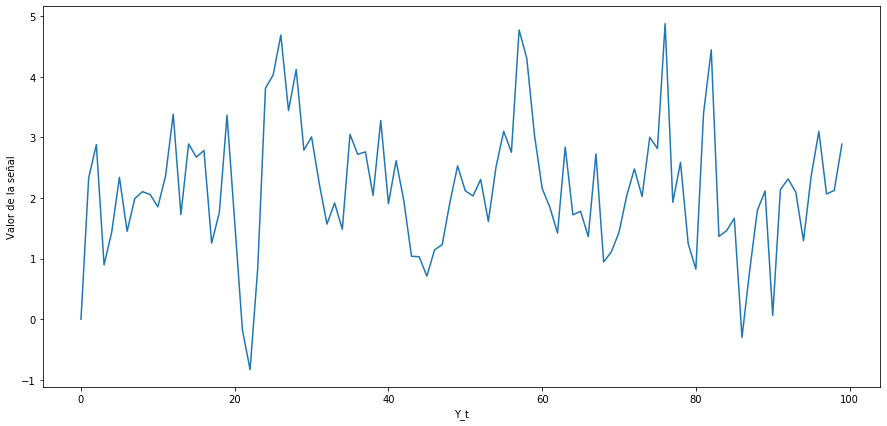

In [3]:
#Formación del vector muestra

Y0 = 0
Y = []
for i in range(T):
    if i == 0:
        Y.append(Y0)
    else:
        Yt = c + phi*Y[-1] + errores[i-1]
        Y.append(Yt)

plt.figure(figsize = (15,7))
plt.plot(Y)
plt.xlabel('Y_t')
plt.ylabel('Valor de la señal')
plt.show()

In [4]:
#Valor de verosimilitud
def Like(theta,Y):
    import numpy as np
    '''
    La función toma los parámetros de la densidad y un vector de muestras de tamaño T+1
    (Si considera el valor inicial Y_0=0) y retorna el valor dde la verosimilitud de la muestra
    '''
    c,phi,sigma2 = theta[0],theta[1],theta[2]
    N = len(Y)-1
    K = 1/(2*np.pi * sigma2)**(N/2)
    vec = [Y[j] - (c + phi*Y[j-1]) for j in range(1,N+1)]
    inter = np.sum([ x**2 for x in vec])
    
    R = K*np.exp((-1/(2*sigma2))*inter)
    return R

In [80]:
T0 = [0,0,1.25] #Pto inicial iteración, valores esperados densidad a priori
f = lambda x: -1*Like(x,Y) #Maximizaremos la función con el input de la muestra fijo
M = minimize(f, T0,method='Nelder-Mead')

In [81]:
print(M)

 final_simplex: (array([[1.26922822, 0.42096235, 0.89532003],
       [1.26928984, 0.4209496 , 0.89529594],
       [1.26918467, 0.42098487, 0.89529223],
       [1.26922584, 0.42094117, 0.89524968]]), array([-2.34618018e-59, -2.34618010e-59, -2.34618010e-59, -2.34617989e-59]))
           fun: -2.346180184917424e-59
       message: 'Optimization terminated successfully.'
          nfev: 324
           nit: 183
        status: 0
       success: True
             x: array([1.26922822, 0.42096235, 0.89532003])


In [82]:
#Valor de la función en el punto máximo
Like(M.x,Y)

2.346180184917424e-59

In [83]:
#Valor de la función en los parámetros reales
Like([c,phi,sigma2],Y)

7.512976861427462e-60

### Parte 2.e) 
Suponga que no poseemos más información sobre los parámetros mas que el rango en que pueden tomar valores:
1. $c \in [-3,3]$
2. $\varphi \in [-1,1]$
3. $\sigma^2 \in [0.5,2]$

Obtengo un estimador MAP de $\theta$.

Tomaremos como densidad apriori $\theta \sim \pi(\theta) = \nu(c)\otimes \eta(\varphi) \otimes \mu(\sigma^2)$. Donde $\nu(c) = unif(-3,3)$, $\eta(\varphi) = unif(-1,1)$ y $\mu(\sigma^2) = unif(0.5,2)$.

Por este motivo definimos restricciones (en forma de cotas) para el modelo de optimización anterior.

In [91]:
#cotas
lb = [-3,-1,0.5]
ub = [3,1,2]
bnds = list(zip(lb,ub))

T0 = [0,0,1.25] #Pto inicial iteración, valores esperados densidad a priori
f2 = lambda x: -(1/18)*Like(x,Y) #Maximizaremos la función con el input de la muestra fijo
M2 = minimize(f2, T0,method='Nelder-Mead', bounds = bnds)

In [92]:
print(M2)

 final_simplex: (array([[1.26922822, 0.42096235, 0.89532003],
       [1.26928984, 0.4209496 , 0.89529594],
       [1.26918467, 0.42098487, 0.89529223],
       [1.26922584, 0.42094117, 0.89524968]]), array([-1.30343344e-60, -1.30343339e-60, -1.30343339e-60, -1.30343327e-60]))
           fun: -1.3034334360652355e-60
       message: 'Optimization terminated successfully.'
          nfev: 324
           nit: 183
        status: 0
       success: True
             x: array([1.26922822, 0.42096235, 0.89532003])


In [93]:
M2.x == M.x #Se comprueba que el resultado es exáctamente el mismo, por lo explicado en el reporte

array([ True,  True,  True])

In [87]:
-M2.fun

1.3034334360652355e-60

### Parte 2.f.
Tomando

$$c \sim \mathcal{N}(0,1),\hspace{0.3cm}\varphi \sim Unif(-1,1),\hspace{0.3cm}\sigma^2 \sim \chi^2(1).$$

tenemos que

$$L\left(\theta;Y_t,\cdots,Y_1\right)\pi(\theta) = L\left(\theta;Y_t,\cdots,Y_1\right)\left(\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}c^2}\right)\,\left(\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\sigma^2}1_{\sigma^2>0}\right)\,\frac{1_{\varphi \in [-1,1]}}{2}$$

In [100]:
normal = lambda c: (1/np.sqrt(2*np.pi))*np.exp(-0.5*(c**2))
unif = lambda x: 1/2
chis = lambda x: (1/np.sqrt(2*np.pi*x))*np.exp(-0.5*x)

#cotas
lb2 = [-np.inf, -1,0]
ub2 = [np.inf, 1,np.inf]
bnds2 = list(zip(lb2,ub2))

f3 = lambda x: -1*(Like(x,Y)*normal(x[0])*unif(x[1])*chis(x[2]))

M3 = minimize(f3, T0,method='Nelder-Mead', bounds = bnds2)

In [101]:
print(M3)

 final_simplex: (array([[1.21503122, 0.44123302, 0.87919832],
       [1.21495616, 0.44126321, 0.87919503],
       [1.21499792, 0.44124322, 0.87914288],
       [1.21501781, 0.44125429, 0.87921745]]), array([-5.88525714e-61, -5.88525711e-61, -5.88525690e-61, -5.88525653e-61]))
           fun: -5.8852571442972354e-61
       message: 'Optimization terminated successfully.'
          nfev: 341
           nit: 195
        status: 0
       success: True
             x: array([1.21503122, 0.44123302, 0.87919832])


### Parte 2.g.
Función para comparar las predicciones en función de la cantidad del data set

In [150]:
def Datos(c,phi,sigma2,N):
    '''
    Función que genera una muestra de tamaño N, dsitribuida comNo theta
    '''
    errores = np.random.normal(0,sigma2,N-1)
    Y0 = 0
    Y = []
    for i in range(N):
        if i == 0:
            Y.append(Y0)
        else:
            Yt = c + phi*Y[-1] + errores[i-1]
            Y.append(Yt)
    return Y


N = [i for i in range(1,201)]
Cs1 = []
Cs2 = []
Fis1 = []
Fis2 = []
Sigmas2_1 =[]
Sigmas2_2 =[]
for i in N:
    T0 = [0,0,1.25]
    l = [-np.inf, -1,0]
    u = [np.inf, 1,np.inf]
    cotas = list(zip(l,u))
    
    Y = Datos(1,0.5,1,i)
    f = lambda x: -Like(x,Y)
    f2 = lambda x: -1*(Like(x,Y)*normal(x[0])*unif(x[1])*chis(x[2]))
    M = minimize(f, T0, method='Nelder-Mead')
    M2 = minimize(f2, T0, method='Nelder-Mead', bounds = cotas)
    
    x1 = M.x
    x2 = M2.x
    Cs1.append(x1[0])
    Cs2.append(x2[0])
    Fis1.append(x1[1])
    Fis2.append(x2[1])
    Sigmas2_1.append(x1[2])
    Sigmas2_2.append(x2[2])

C:\Users\paula\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\paula\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\paula\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  


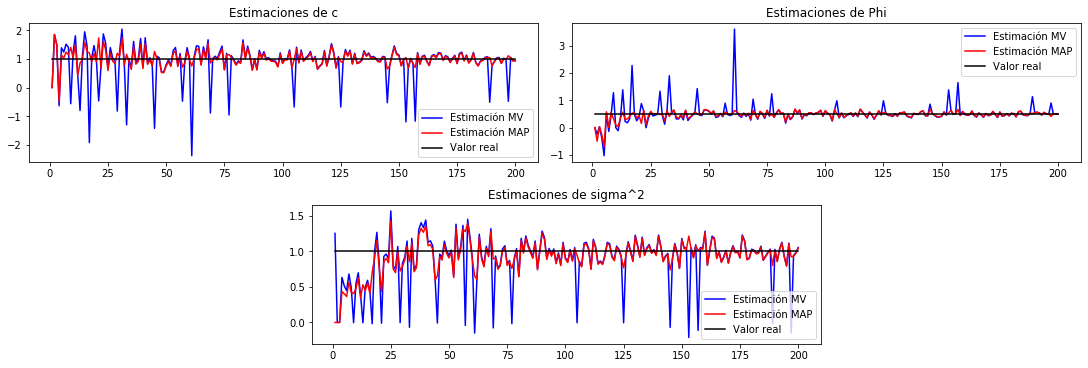

In [172]:
Creal = np.ones(200)
Fireal = 0.5*np.ones(200)
Sigma_real = np.ones(200)

fig = plt.figure(figsize = (15,5), constrained_layout=True)
gs = fig.add_gridspec(2, 4)
ax1=fig.add_subplot(gs[0,:-2])
ax1.plot(N,Cs1, color = 'b', label = 'Estimación MV')
ax1.plot(N,Cs2, color = 'r', label = 'Estimación MAP')
ax1.plot(N, Creal, color = 'k', label = 'Valor real')
ax1.set_title('Estimaciones de c')
ax1.legend()
ax2=fig.add_subplot(gs[0,-2:])
ax2.plot(N,Fis1, color = 'b', label = 'Estimación MV')
ax2.plot(N,Fis2, color = 'r', label = 'Estimación MAP')
ax2.plot(N, Fireal, color = 'k', label = 'Valor real')
ax2.set_title('Estimaciones de Phi')
ax2.legend()
ax3=fig.add_subplot(gs[1,1:3])
ax3.plot(N,Sigmas2_1, color = 'b', label = 'Estimación MV')
ax3.plot(N,Sigmas2_2, color = 'r', label = 'Estimación MAP')
ax3.plot(N, Sigma_real, color = 'k', label = 'Valor real')
ax3.set_title('Estimaciones de sigma^2')
ax3.legend()

In [177]:
C1_std = np.mean((Cs1 - Creal)**2)
C2_std = np.mean((Cs2 - Creal)**2)
F1_std = np.mean((Fis1 - Fireal)**2)
F2_std = np.mean((Fis2 - Fireal)**2)
Sigma1_std = np.mean((Sigmas2_1 - Sigma_real)**2)
Sigma2_std = np.mean((Sigmas2_2 - Sigma_real)**2)

print('El error medio de C1 es: ',C1_std)
print('El error medio de C2 es: ',C2_std)
print('El error medio de Phi 1 es: ',F1_std)
print('El error medio de Phi 2 es: ',F2_std)
print('El error medio de Sigma^2 1 es: ',Sigma1_std)
print('El error medio de Sigma^2 2 es: ',Sigma2_std)

El error medio de C1 es:  0.4655165328378439
El error medio de C2 es:  0.07510796391659035
El error medio de Phi 1 es:  0.1468721544012427
El error medio de Phi 2 es:  0.029888551081183604
El error medio de Sigma^2 1 es:  0.1449271579837662
El error medio de Sigma^2 2 es:  0.06016586433053527


In [178]:
print(C1_std/C2_std)
print(F1_std/F2_std)
print(Sigma1_std/Sigma2_std)

6.197965016796541
4.913993789873152
2.408793750349449
